# CCLAMP Network: Community detection

In [1]:
# Import packages
import pandas as pd
import networkx as nx
import numpy as np
from pyvis.network import Network
import community.community_louvain as community_louvain

In [2]:
# Read the network
network = pd.read_csv("CCLAMP_Directed_Network.txt", sep="\t", encoding='utf-8')
network.head(10)

,Target,Source,Weight,Author,DOB
0,Henri Bruning,Henk Kuitenbrouwer,12,Henri Bruning,10 juli 1900
1,Albert Kuyle,Henk Kuitenbrouwer,37,Albert Kuyle,17 februari 1904
2,Albe,Henk Kuitenbrouwer,25,Albe,8 juni 1902
3,Dirk Coster,Henk Kuitenbrouwer,11,Dirk Coster,7 juli 1887
4,Dirk Coster,Jan Engelman,13,Dirk Coster,7 juli 1887
5,Erich Wichman,Jan Engelman,6,Erich Wichman,11 augustus 1890
6,Willem Pijper,Jan Engelman,5,Willem Pijper,8 september 1894
7,Albe,Jan Engelman,27,Albe,8 juni 1902
8,Henri Bruning,Jan Engelman,6,Henri Bruning,10 juli 1900
9,Just Havelaar,Jan Engelman,5,Just Havelaar,12 februari 1880


In [3]:
# Create a weighted graph
G = nx.from_pandas_edgelist(network, 
                            source = 'Source', 
                            target = 'Target', 
                            edge_attr = 'Weight',
                            create_using = nx.Graph())
print(G)

Graph with 1647 nodes and 6531 edges


In [4]:
net = Network(notebook = True, width="1000px", height="700px", bgcolor="#222222", font_color="white")

node_degree = dict(G.degree)
      
# setting up node attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('CCLAMP.html')

CCLAMP.html


# Detect communities

In [4]:
communities = community_louvain.best_partition(G)
communities

{'Henk Kuitenbrouwer': 1,
 'Henri Bruning': 1,
 'Albert Kuyle': 1,
 'Albe': 1,
 'Dirk Coster': 1,
 'Jan Engelman': 1,
 'Erich Wichman': 1,
 'Willem Pijper': 1,
 'Just Havelaar': 1,
 'Gerard Bruning': 1,
 'Joep Nicolas': 1,
 'Gerard Brom': 1,
 'Bernard Verhoeven': 1,
 'Leopold': 2,
 'Johan de Meester': 3,
 'Léon': 4,
 'Karel van den Oever': 1,
 'Huib Luns': 1,
 'Wies Moens': 4,
 'Marnix Gijsen': 1,
 'Herman Teirlinck': 1,
 'Richard Minne': 1,
 'J.C. Bloem': 5,
 'Albert Helman': 1,
 'G.P.M. Knuvelder': 1,
 'Frederik van Eeden': 5,
 'Menno ter Braak': 1,
 'Willem Nieuwenhuis': 1,
 'Herman de Man': 1,
 'Henriette Roland Holst-van der Schalk': 1,
 'Charles Eyck': 1,
 'H. Marsman': 1,
 'A. den Doolaard': 1,
 'Anton van Duinkerken': 1,
 'A.A.M. Stols': 2,
 'M. Stol': 2,
 'Herman Gorter': 5,
 'A. Roland Holst': 1,
 'Ernest Michel': 1,
 'A.M. de Jong': 1,
 'Willem Maas': 1,
 'Hendrik de Vries': 1,
 'Novalis': 1,
 'Albert Verwey': 5,
 'Antoon Coolen': 1,
 'Stijn Streuvels': 1,
 'H.E.H. van Loon'

In [5]:
communities_df = pd.DataFrame.from_dict(communities, orient='index')
communities_df = communities_df.rename_axis('Author').reset_index()
communities_df.columns = ['Author', 'Community']

communities_df.head(10)

,Author,Community
0,Henk Kuitenbrouwer,1
1,Henri Bruning,1
2,Albert Kuyle,1
3,Albe,1
4,Dirk Coster,1
5,Jan Engelman,1
6,Erich Wichman,1
7,Willem Pijper,1
8,Just Havelaar,1
9,Gerard Bruning,1


# Create list of authors and their DOB, POB and POD

In [6]:
# make list of all authors and their birth dates

# Read metadata file with the authors
metadata_df = pd.read_csv("C-CLAMP_metadata_gender.txt", sep="\t", encoding='utf-8')

# Select Author and DOB
metadata = metadata_df[['Author', 'DOB']]

# Flatten the dataframe
flattened_data = []

for index, row in metadata.iterrows():
    authors = str(row['Author']).split('; ')
    dobs = str(row['DOB']).split('; ')
    
    for author, dob in zip(authors, dobs):
        flattened_data.append({'Author': author, 'DOB': dob})

flattened_df = pd.DataFrame(flattened_data)

# Replace 'NA' or 'nan' with NaN
flattened_df.replace(['NA', 'nan'], np.nan, inplace=True)

# Remove duplicate rows
authors_dob_df = flattened_df.drop_duplicates()

# Display the flattened dataframe
authors_dob_df.head(10)

,Author,DOB
0,NaN,NaN
1,Jan Engelman,7 juni 1900
2,Willem Maas,28 april 1897
3,Joep Nicolas,6 oktober 1897
5,Albert Helman,7 november 1903
6,Willem Nieuwenhuis,1886
7,Karel van den Oever,19 november 1879
9,Wies Moens,28 januari 1898
10,Eduard A. Serrarens,27 december 1895
11,Henk Kuitenbrouwer,20 november 1903


In [7]:
# save DOB list
authors_dob_df.to_csv("author_DOB_list.txt", index=False, sep='\t', encoding='utf-8')

In [8]:
# make list of all authors and their places of birth

# Select Author and POB
metadata = metadata_df[['Author', 'POB']]

# Flatten the dataframe
flattened_data = []

for index, row in metadata.iterrows():
    authors = str(row['Author']).split('; ')
    pobs = str(row['POB']).split('; ')
    
    for author, pob in zip(authors, pobs):
        flattened_data.append({'Author': author, 'POB': pob})

flattened_df = pd.DataFrame(flattened_data)

# Replace 'NA' or 'nan' with NaN
flattened_df.replace(['NA', 'nan'], np.nan, inplace=True)

# Remove duplicate rows
authors_pob_df = flattened_df.drop_duplicates()

# Remove duplicate authors where the pob is nan
# Loop over the DataFrame
for author in authors_pob_df['Author'].unique():
    author_entries = authors_pob_df[authors_pob_df['Author'] == author]
    
    # Check if there are multiple entries for the author
    if len(author_entries) > 1:
        # Keep the entry where POB is not NaN
        filtered_entry = author_entries.dropna(subset=['POB']).iloc[0]
        
        # Drop other entries for the same author
        authors_pob_df = authors_pob_df.drop(authors_pob_df[authors_pob_df['Author'] == author].index)
        
        # Append the filtered entry back to the DataFrame
        authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
        
# Display the flattened dataframe
authors_pob_df.head(20)

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\16102070.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

,Author,POB
0,NaN,NaN
1,Willem Maas,Utrecht
2,Joep Nicolas,NaN
3,Willem Nieuwenhuis,NaN
4,Karel van den Oever,Antwerpen
5,Wies Moens,Sint-Gillis-Bij-Dendermonde
6,Eduard A. Serrarens,Maastricht
7,L.J.M. Feber,Bergen op Zoom
8,G.P.M. Knuvelder,Arnhem
9,Jan Bruna,NaN


In [9]:
# save POB list
authors_pob_df.to_csv("author_POB_list.txt", index=False, sep='\t', encoding='utf-8')

In [10]:
# make list of all authors and their places of death

# Select Author and POD
metadata = metadata_df[['Author', 'POD']]

# Flatten the dataframe
flattened_data = []

for index, row in metadata.iterrows():
    authors = str(row['Author']).split('; ')
    pods = str(row['POD']).split('; ')
    
    for author, pod in zip(authors, pods):
        flattened_data.append({'Author': author, 'POD': pod})

flattened_df = pd.DataFrame(flattened_data)

# Replace 'NA' or 'nan' with NaN
flattened_df.replace(['NA', 'nan'], np.nan, inplace=True)

# Remove duplicate rows
authors_pod_df = flattened_df.drop_duplicates()

# Remove duplicate authors where the pod is nan
# Loop over the DataFrame
for author in authors_pod_df['Author'].unique():
    author_entries = authors_pod_df[authors_pod_df['Author'] == author]
    
    # Check if there are multiple entries for the author
    if len(author_entries) > 1:
        # Keep the entry where pod is not NaN
        filtered_entry = author_entries.dropna(subset=['POD']).iloc[0]
        
        # Drop other entries for the same author
        authors_pod_df = authors_pod_df.drop(authors_pod_df[authors_pod_df['Author'] == author].index)
        
        # Append the filtered entry back to the DataFrame
        authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)

# Display the flattened dataframe
authors_pod_df.head(20)

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_19968\3117580653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

,Author,POD
0,NaN,NaN
1,Willem Maas,Utrecht
2,Willem Nieuwenhuis,NaN
3,Karel van den Oever,Antwerpen
4,Wies Moens,Geleen
5,Eduard A. Serrarens,Roermond
6,L.J.M. Feber,Den Haag
7,G.P.M. Knuvelder,Eindhoven
8,Jan Bruna,NaN
9,Bernard Verhoeven,Arnhem


In [11]:
# save POD list
authors_pod_df.to_csv("author_POD_list.txt", index=False, sep='\t', encoding='utf-8')

# Merge communities with DOB, POB & POB

In [12]:
communities_df = pd.merge(communities_df, authors_dob_df, on='Author', how='inner')  # 'inner' means keep only common rows
communities_df = pd.merge(communities_df, authors_pob_df, on='Author', how='inner')  # 'inner' means keep only common rows
communities_df = pd.merge(communities_df, authors_pod_df, on='Author', how='inner')  # 'inner' means keep only common rows

communities_df.head(10)

,Author,Community,DOB,POB,POD
0,Henk Kuitenbrouwer,1,20 november 1903,Utrecht,Utrecht
1,Henri Bruning,1,10 juli 1900,Amsterdam,Nijmegen
2,Albert Kuyle,1,17 februari 1904,Utrecht,Utrecht
3,Albe,1,8 juni 1902,Mechelen,Brussel
4,Dirk Coster,1,7 juli 1887,Delft,Delft
5,Jan Engelman,1,7 juni 1900,Utrecht,Amsterdam
6,Erich Wichman,1,11 augustus 1890,Utrecht,Amsterdam
7,Willem Pijper,1,8 september 1894,Zeist,Leidschendam
8,Just Havelaar,1,12 februari 1880,Rotterdam,Amersfoort
9,Gerard Bruning,1,18 februari 1898,Amsterdam,Nijmegen


# Save communities

In [13]:
communities_df.to_csv("CCLAMP_Network_Communities.txt", index=True, sep='\t', encoding='utf-8')

# How many members does each community have?

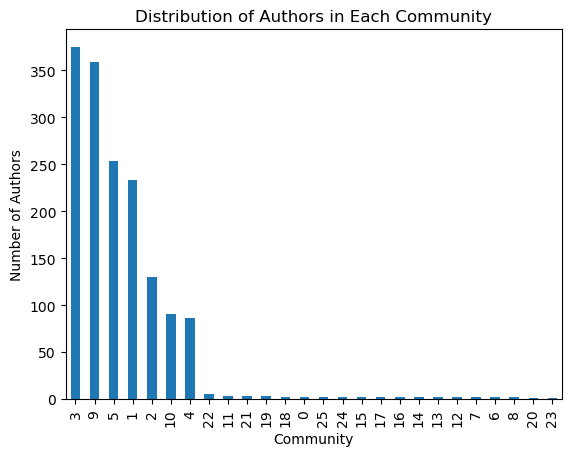

In [22]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named communities_df
communities_df['Community'].value_counts().plot(kind='bar')

# Adding labels and title
plt.xlabel('Community')
plt.ylabel('Number of Authors')
plt.title('Distribution of Authors in Each Community')

# Display the plot
plt.show()


# What is the most frequent POB per community?

In [15]:
# Find the top 5 most frequent PlaceOfBirth values per community
top_pob_per_community = communities_df.groupby('Community')['POB'].apply(lambda x: x.value_counts().head(5).reset_index(name='Frequency').values.tolist() if not x.empty else [])

# Create DataFrames to display the results
top_pob_per_community_df = pd.DataFrame(top_pob_per_community.tolist(), index=top_pob_per_community.index).fillna('')
top_pob_per_community_df.columns = [f'POB_{i+1}' for i in range(5)]

# Display the results
print("Top 5 Most Frequent PlaceOfBirth per Community:")
print(top_pob_per_community_df)


Top 5 Most Frequent PlaceOfBirth per Community:
                      POB_1            POB_2            POB_3  \
Community                                                       
0                                                               
1           [Amsterdam, 20]  [Antwerpen, 19]   [Rotterdam, 8]   
2           [Amsterdam, 10]    [Den Haag, 7]   [Rotterdam, 7]   
3           [Amsterdam, 53]   [Den Haag, 14]  [Antwerpen, 13]   
4             [Turnhout, 4]   [Antwerpen, 3]   [Etterbeek, 2]   
5           [Amsterdam, 13]   [Den Haag, 12]   [Rotterdam, 9]   
6            [Zierikzee, 1]   [Amsterdam, 1]                    
7          [Zoeterwoude, 1]                                     
8                                                               
9           [Amsterdam, 23]  [Antwerpen, 10]    [Den Haag, 9]   
10          [Amsterdam, 18]    [Den Haag, 5]     [Utrecht, 3]   
11           [Amsterdam, 2]  [Appingedam, 1]                    
12          [Leeuwarden, 1]               

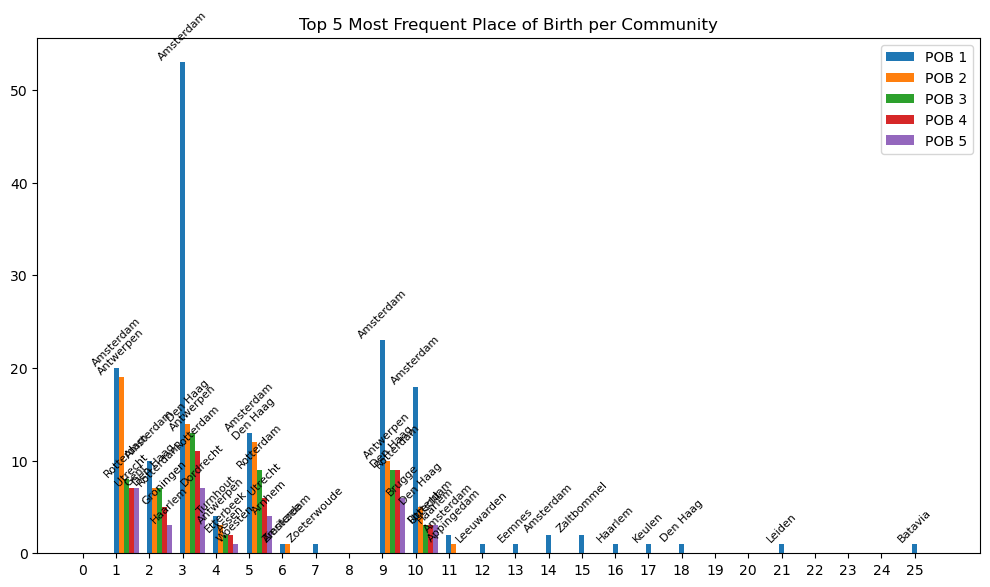

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Find the top 5 most frequent PlaceOfBirth values per community
top_pob_per_community = communities_df.groupby('Community')['POB'].apply(lambda x: x.value_counts().head(5).reset_index(name='Frequency').values.tolist() if not x.empty else [])

# Create a DataFrame to display the results
top_pob_per_community_df = pd.DataFrame(top_pob_per_community.tolist(), index=top_pob_per_community.index).fillna('')
top_pob_per_community_df.columns = [f'POB {i+1}' for i in range(5)]

# Plotting the bar plot for Place of Birth
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.bar(np.arange(len(top_pob_per_community_df.index)) + i * 0.15, top_pob_per_community_df[f'POB {i+1}'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else 0), width=0.15, label=f'POB {i+1}')

plt.title('Top 5 Most Frequent Place of Birth per Community')
plt.xticks(np.arange(len(top_pob_per_community_df.index)), top_pob_per_community_df.index)
plt.legend()

# Add labels to the bars
for i, community in enumerate(top_pob_per_community_df.index):
    for j in range(5):
        label = top_pob_per_community_df.at[community, f'POB {j+1}']
        if isinstance(label, list) and len(label) > 1:
            plt.text(i + j * 0.15, label[1] + 0.05, label[0], ha='center', va='bottom', rotation=45, fontsize=8)

plt.tight_layout()
plt.show()


# What is the most frequent POD per community?

In [17]:
# Find the top 5 most frequent PlaceOfDeath values per community
top_pod_per_community = communities_df.groupby('Community')['POD'].apply(lambda x: x.value_counts().head(5).reset_index(name='Frequency').values.tolist() if not x.empty else [])

# Create DataFrames to display the results
top_pod_per_community_df = pd.DataFrame(top_pod_per_community.tolist(), index=top_pod_per_community.index).fillna('')
top_pod_per_community_df.columns = [f'POD_{i+1}' for i in range(5)]

# Display the results
print("\nTop 5 Most Frequent PlaceOfDeath per Community:")
print(top_pod_per_community_df)


Top 5 Most Frequent PlaceOfDeath per Community:
                     POD_1            POD_2           POD_3           POD_4  \
Community                                                                     
0                                                                             
1          [Antwerpen, 19]  [Amsterdam, 16]  [Den Haag, 12]   [Brussel, 10]   
2          [Amsterdam, 15]    [Den Haag, 7]    [Haarlem, 6]  [Groningen, 5]   
3          [Amsterdam, 35]   [Den Haag, 32]    [Leiden, 22]   [Utrecht, 15]   
4              [Brugge, 3]        [Gent, 2]      [Zeist, 2]     [Geleen, 1]   
5             [Leiden, 14]  [Amsterdam, 12]    [Utrecht, 7]   [Den Haag, 6]   
6           [Amsterdam, 2]                                                    
7                                                                             
8           [Boedapest, 1]                                                    
9          [Amsterdam, 19]    [Den Haag, 5]  [Antwerpen, 5]     [Leiden, 4]   
10 

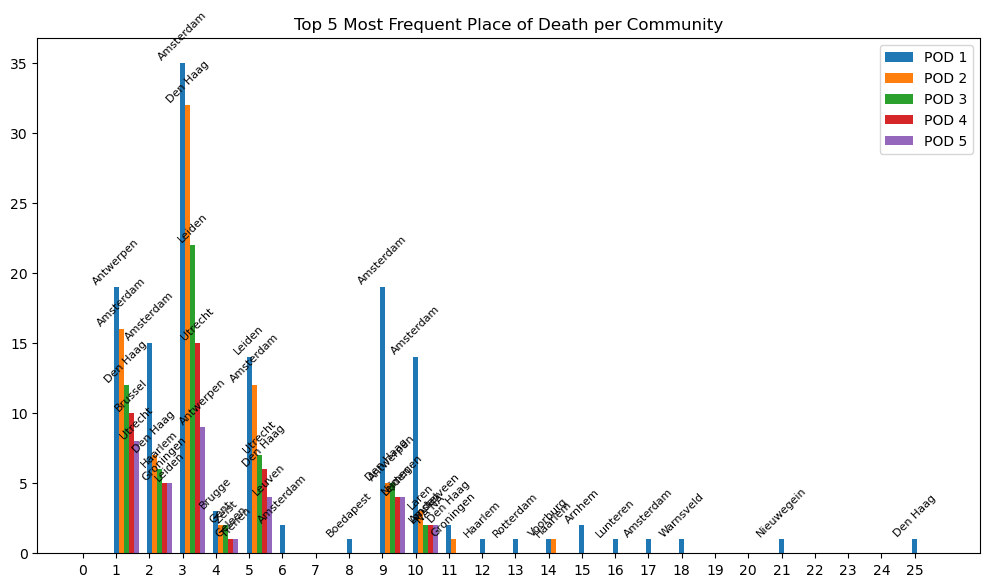

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Find the top 5 most frequent PlaceOfDeath values per community
top_pod_per_community = communities_df.groupby('Community')['POD'].apply(lambda x: x.value_counts().head(5).reset_index(name='Frequency').values.tolist() if not x.empty else [])

# Create a DataFrame to display the results
top_pod_per_community_df = pd.DataFrame(top_pod_per_community.tolist(), index=top_pod_per_community.index).fillna('')
top_pod_per_community_df.columns = [f'POD {i+1}' for i in range(5)]

# Plotting the bar plot for Place of Death
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.bar(np.arange(len(top_pod_per_community_df.index)) + i * 0.15, top_pod_per_community_df[f'POD {i+1}'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else 0), width=0.15, label=f'POD {i+1}')

plt.title('Top 5 Most Frequent Place of Death per Community')
plt.xticks(np.arange(len(top_pod_per_community_df.index)), top_pod_per_community_df.index)
plt.legend()

# Add labels to the bars
for i, community in enumerate(top_pod_per_community_df.index):
    for j in range(5):
        label = top_pod_per_community_df.at[community, f'POD {j+1}']
        if isinstance(label, list) and len(label) > 1:
            plt.text(i + j * 0.15, label[1] + 0.05, label[0], ha='center', va='bottom', rotation=45, fontsize=8)

plt.tight_layout()
plt.show()


# Which authors are the most important (according to centrality measures)?

In [19]:
centrality_df = pd.read_csv("CCLAMP_Network_Centralities.txt", sep="\t", encoding='utf-8')
centrality_df.head(10)

,Author,Harmonic,Closeness,Degree,Betweenness
0,Jan Noordegraaf,104.267460,0.054216,0.002430,0.000000
1,Gery Helderenberg,0.000000,0.000000,0.000608,0.000000
2,Han Lammers,139.287302,0.071825,0.031592,0.003320
3,A.J.J. de Witte,130.399206,0.070754,0.001215,0.000000
4,H.M. Hermkens,121.426587,0.063738,0.004253,0.000000
5,H.J.J.M. van der Merwe,1.000000,0.000608,0.000608,0.000000
6,G. van Benthem van den Bergh,94.955556,0.051812,0.007290,0.002613
7,W.R. van Hoëvell,92.202381,0.052832,0.000608,0.000000
8,C. Kruyskamp,150.113095,0.078934,0.005468,0.000000
9,A. Kraak,119.759921,0.063604,0.002430,0.000000


In [20]:
merged_df = pd.merge(communities_df, centrality_df, on='Author', how='inner')  # 'inner' means keep only common rows
merged_df.to_csv("CCLAMP_Network_Communities_Centrality.txt", index=True, sep='\t', encoding='utf-8')
merged_df.head(10)

,Author,Community,DOB,POB,POD,Harmonic,Closeness,Degree,Betweenness
0,Henk Kuitenbrouwer,1,20 november 1903,Utrecht,Utrecht,142.760714,0.079097,0.017618,0.000344
1,Henri Bruning,1,10 juli 1900,Amsterdam,Nijmegen,146.427381,0.081161,0.003038,0.000000
2,Albert Kuyle,1,17 februari 1904,Utrecht,Utrecht,147.760714,0.081398,0.011543,0.000045
3,Albe,1,8 juni 1902,Mechelen,Brussel,408.483333,0.214136,0.178615,0.000000
4,Dirk Coster,1,7 juli 1887,Delft,Delft,196.200000,0.105997,0.018226,0.000179
5,Jan Engelman,1,7 juni 1900,Utrecht,Amsterdam,171.842857,0.093045,0.030984,0.004345
6,Erich Wichman,1,11 augustus 1890,Utrecht,Amsterdam,122.144048,0.069533,0.001215,0.000000
7,Willem Pijper,1,8 september 1894,Zeist,Leidschendam,126.144048,0.071322,0.001823,0.000000
8,Just Havelaar,1,12 februari 1880,Rotterdam,Amersfoort,139.359524,0.077967,0.001823,0.000000
9,Gerard Bruning,1,18 februari 1898,Amsterdam,Nijmegen,146.427381,0.081161,0.003038,0.000000


In [30]:
# Display top 100 authors sorted by Harmonic centrality
top_100_authors = merged_df.nlargest(100, 'Harmonic')

top_100_authors.head(20)

,Author,Community,DOB,POB,POD,Harmonic,Closeness,Degree,Betweenness
3,Albe,1,8 juni 1902,Mechelen,Brussel,408.483333,0.214136,0.178615,0.000000
13,Leopold,2,7 september 1860,Leiden,Haarlem,289.900000,0.152797,0.083232,0.000000
77,Multatuli,3,2 maart 1820,Amsterdam,Nieder-Ingelheim,265.700000,0.137180,0.061361,0.000000
140,Martinus Nijhoff,5,20 april 1894,Den Haag,Den Haag,212.966667,0.109469,0.048603,0.008834
141,Martinus Nijhoff,5,26 december 1826,Den Haag,Den Haag,212.966667,0.109469,0.048603,0.008834
36,A. Roland Holst,1,23 mei 1888,Amsterdam,Bergen,207.876190,0.110272,0.026731,0.003931
52,Guido Gezelle,1,1 mei 1830,Brugge,Brugge,206.392857,0.104109,0.028554,0.000000
69,Hubert,4,20ste eeuw,NaN,NaN,206.061905,0.101172,0.030984,0.000000
578,Peeters,4,20ste eeuw,NaN,NaN,203.045238,0.098569,0.030984,0.000000
18,Marnix Gijsen,1,20 oktober 1899,Antwerpen,Leuven,199.235714,0.099509,0.042527,0.005902


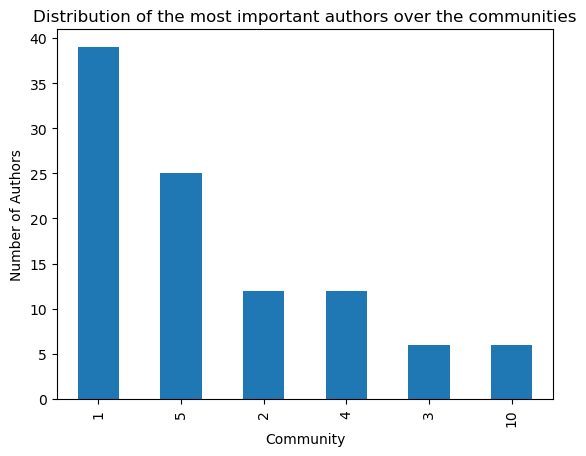

In [32]:
#To which communities do these 100 authors belong?
import matplotlib.pyplot as plt

# Assuming your DataFrame is named communities_df
top_100_authors['Community'].value_counts().plot(kind='bar')

# Adding labels and title
plt.xlabel('Community')
plt.ylabel('Number of Authors')
plt.title('Distribution of the most important authors over the communities')

# Display the plot
plt.show()

In [33]:
# Top 5 authors for each community, again sorted by Harmonic centrality
top_5_authors_per_community = (
    merged_df.groupby('Community', group_keys=False)
    .apply(lambda group: group.nlargest(5, 'Harmonic'))
)

# Displaying relevant columns and formatting the output
columns_to_display = ['Author', 'Community', 'Harmonic']
top_5_authors_per_community_display = top_5_authors_per_community[columns_to_display]

# Use to_string() for a neat display
print(top_5_authors_per_community_display.to_string(index=False))


                    Author  Community   Harmonic
         Jaap van Gelderen          0   1.000000
                  Horatius          0   0.000000
                      Albe          1 408.483333
           A. Roland Holst          1 207.876190
             Guido Gezelle          1 206.392857
             Marnix Gijsen          1 199.235714
      Anton van Duinkerken          1 198.342857
                   Leopold          2 289.900000
            Theun de Vries          2 189.326190
                   M. Stol          2 185.642857
              A.A.M. Stols          2 183.976190
         E.J. Dijksterhuis          2 176.834524
                 Multatuli          3 265.700000
           C.G.N. de Vooys          3 185.676190
         H.T. Colenbrander          3 164.926190
          Jacob van Lennep          3 163.583333
            E.J. Potgieter          3 155.403571
                    Hubert          4 206.061905
                   Peeters          4 203.045238
                Wies

# Visualize communities

In [31]:
# set communities as a node attribute
nx.set_node_attributes(G, communities, 'group')

# draw graph with communities
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("CCLAMP_communities.html")

CCLAMP_communities.html
